**Assignment 1: Introduction to Data Science and Python**
---
**Group 6:**

Name | Contribution 
--- | ---
1. Himanshu Chuphal (guschuhi@student.gu.se) | 12 H
2. Claudio Aguilar Aguilar(claagu@student.chalmers.se) | 12 H

---

In [1]:
#imported python modules
import pandas as pd
import matplotlib.pyplot as plt 
import statistics as stats
import numpy as np
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

1. Data Source: [Life-Expectancy vs. GDP per capita](https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita)

In [2]:
# read the data file - life-expectancy-vs-gdp-per-capita.csv
url = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a1/life-expectancy-vs-gdp-per-capita.csv'
gdp_life_data = pd.read_csv(url)
#Describe the data
gdp_life_data.describe()
# renaming long column name to a short name
gdp_life_data.rename({'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'
                      :'Real GDP per capita in 2011US$'}, 
                     axis='columns', 
                     inplace=True)
gdp_life_data.columns.tolist()

['Entity',
 'Code',
 'Year',
 'Total population (Gapminder, HYDE & UN)',
 'Continent',
 'Life expectancy',
 'Real GDP per capita in 2011US$']

**1.a)	Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.**

Data Description:
- Data for life expectancy and GDP per capita comes from OWID for data from 1950 to 2019.  
- Dataset: 50220 rows × 7 columns
- Scatter plot used to show patterns in large sets of data


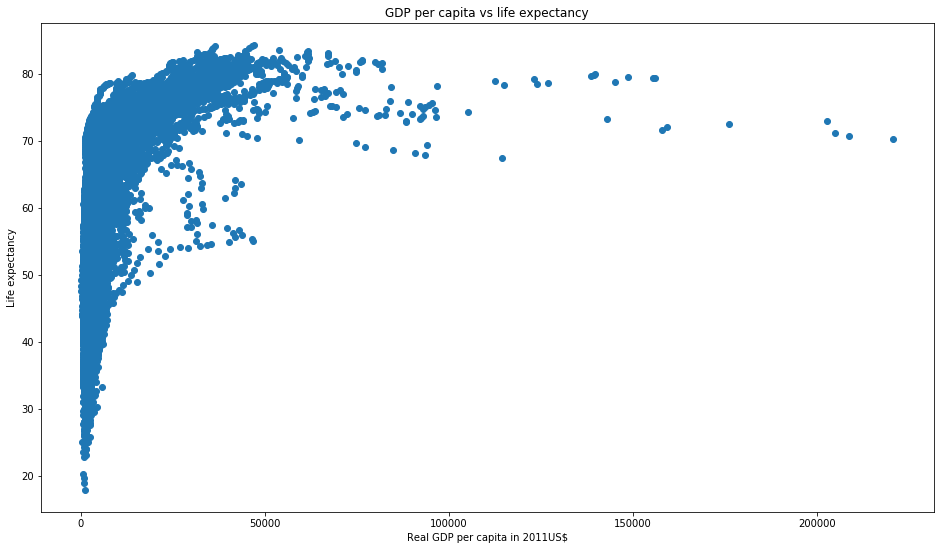

In [3]:
#Plot the original data (without any data cleaning)
gdp_per_capita  = gdp_life_data['Real GDP per capita in 2011US$']
life_expectancy = gdp_life_data['Life expectancy']
plt.figure(figsize=(16, 9))
plt.scatter(gdp_per_capita, life_expectancy)
plt.title('GDP per capita vs life expectancy')
plt.xlabel('Real GDP per capita in 2011US$')
plt.ylabel('Life expectancy')
plt.show()

- Decisions for data selection:

Since the previous scatterplot was pretty crowded, we had to narrow down the data. We decided to plot data from the latest year having sufficent data and from all the continents having data to compare GDP per capita and life expectancy. Since the data in the year range 2016-2019, gave us almost empty dataframe, and 2015 was the only latest year with sufficient data required to do scatter plot, so we decided to use data from 2015. We also decided to use different color for each continent in the plot to make a better observation.

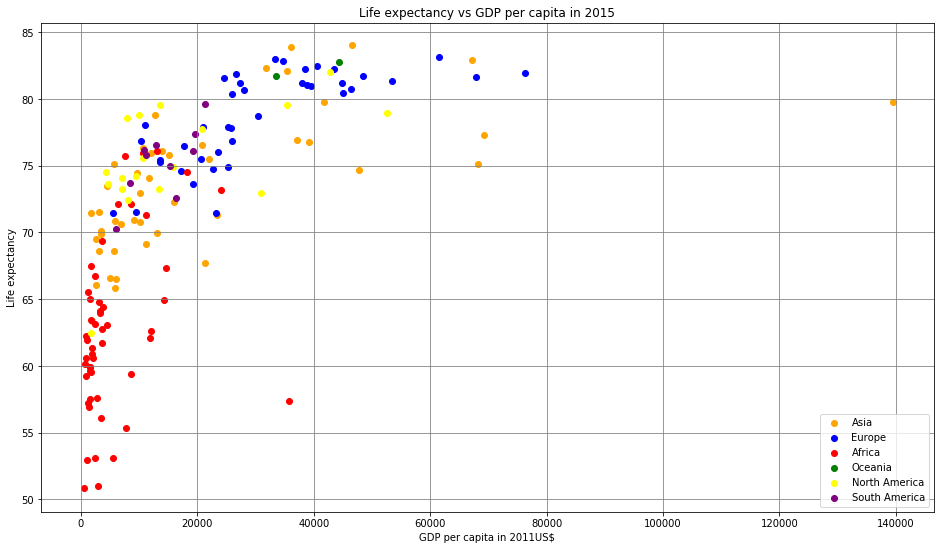

In [4]:
#detect valid values in a DataFrame:gdp_life_data
gdp_life_data_continent = gdp_life_data[pd.notnull(gdp_life_data['Continent'])]
# target data only from latest year having data (2015), from 2015-2019 its not much to plot
gdp_life_data_plt = gdp_life_data_continent.loc[gdp_life_data_continent['Year'].isin(['2015'])]
# split the data into continents
Asia         = gdp_life_data_plt.loc[gdp_life_data_plt['Continent'].isin(['Asia'])]
Europe       = gdp_life_data_plt.loc[gdp_life_data_plt['Continent'].isin(['Europe'])]
Africa       = gdp_life_data_plt.loc[gdp_life_data_plt['Continent'].isin(['Africa'])]
Oceania      = gdp_life_data_plt.loc[gdp_life_data_plt['Continent'].isin(['Oceania'])]
NorthAmerica = gdp_life_data_plt.loc[gdp_life_data_plt['Continent'].isin(['North America'])]
SouthAmerica = gdp_life_data_plt.loc[gdp_life_data_plt['Continent'].isin(['South America'])]
plt.figure(figsize=(16, 9))

#x(gdp per capita) and y(Life expectancy) for each continent
Asia_gdp  = Asia['Real GDP per capita in 2011US$']
Asia_life = Asia['Life expectancy']
Europe_gdp  = Europe['Real GDP per capita in 2011US$']
Europe_life = Europe['Life expectancy']
Africa_gdp  = Africa['Real GDP per capita in 2011US$']
Africa_life = Africa['Life expectancy']
Oceania_gdp  = Oceania['Real GDP per capita in 2011US$']
Oceania_life = Oceania['Life expectancy']
NorthAmerica_gdp  = NorthAmerica['Real GDP per capita in 2011US$']
NorthAmerica_life = NorthAmerica['Life expectancy']
SouthAmerica_gdp  = SouthAmerica['Real GDP per capita in 2011US$']
SouthAmerica_life = SouthAmerica['Life expectancy']

#scatter plot each continent with a particular color to differentiate
plt.scatter(Asia_gdp, Asia_life, color='orange')
plt.scatter(Europe_gdp, Europe_life, color='blue')
plt.scatter(Africa_gdp, Africa_life, color='red')
plt.scatter(Oceania_gdp, Oceania_life, color='green')
plt.scatter(NorthAmerica_gdp, NorthAmerica_life, color='yellow')
plt.scatter(SouthAmerica_gdp, SouthAmerica_life, color='purple')

plt.xlabel('GDP per capita in 2011US$')
plt.ylabel('Life expectancy')
plt.title('Life expectancy vs GDP per capita in 2015')
#plot labels for each continent
plt.legend(["Asia", "Europe", "Africa", "Oceania", "North America", "South America"],
           loc ="lower right") 
#add grid to the plot
plt.grid(True, color='gray')
#plot the final result
plt.show()

We also did the same plot for Sovereign states (Denmark, Norway, Sweden, Iceland) within Europe. From the scatter plot, we can say that Iceland and Sweden have high expectancy even though GDP per capita is not as good as in Norway. Denmark has a bit higher GDP per capita but for some reasons has very low life expectancy.

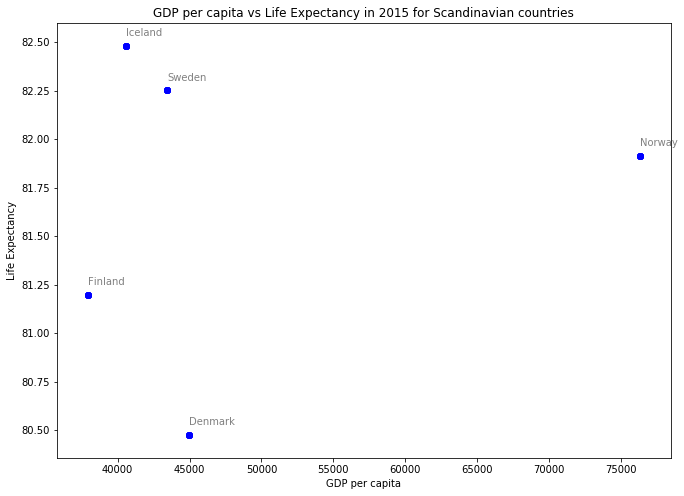

In [5]:
# Countries
# Sovereign states  - Denmark, Norway, Sweden, Iceland
Scandinavia_data = gdp_life_data.loc[gdp_life_data['Entity'].isin(['Denmark', 'Iceland',
                                                                   'Norway', 'Sweden', 'Finland'])] 
Scandinavia = Scandinavia_data.loc[Scandinavia_data['Year'].isin(['2015'])]
#list of the Scaninavian countries
Scandinavian_countries = Scandinavia['Entity']
#gdp per capita and life expectancy for the scandinavian countries
Scandinavia_gdp  = Scandinavia['Real GDP per capita in 2011US$']
Scandinavia_life = Scandinavia['Life expectancy']
#x and y values
x = Scandinavia_gdp.values
y = Scandinavia_life.values
plt.subplots(figsize=(11,8))
for i, txt in enumerate(Scandinavian_countries.values):
  plt.annotate(txt, (x[i], y[i]), xytext=(0,10), textcoords= 
               'offset points', color='gray')
  plt.scatter(x,y, color='blue')
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.title('GDP per capita vs Life Expectancy in 2015 for Scandinavian countries')
plt.show()

**1.b)	Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained.**
- GDP per capita roughly determines the standard of living in a particular country, there is a big difference at the left side of the plot, wherein the life expectancy differs a lot similar to GDP per capita and the curve flattens thereafter for richer countries ( mostly in Europe, North America and some in Asia)

1.   The life expectancy seems to mostly increase with higher GDP per capita in each continent.
2.   The countries in Europe seem to have better life expectancy and GDP per capita.
3. Asia seems to have scattered life expectancy groups, whereas African countries seems to have very low GDP per capita and hence very low life expectancy.

Overall, the life expectancy seems to increase with GDP per capita, but as we see some exception in the plot, we believe that the life expectancy doesn't necessarliy depend on standard of living but maybe some other factors too.


**1.c)	Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why. If not, explain why you did not need to.**
- Yes, we did 3 different data cleaning to make it easier for us to plot and visualize the data:


1.   As the plot for all the countries is so crowded due to so many entries ( as seen in the first plot in **1.a**), we decided to plot data from the latest year having sufficent data and from all the continents having data to compare GDP per capita and life expectancy. As we checked **2016-2019**, gave us almost empty dataframe, and 2015 is the only latest year with sufficient data required to do scatter plot, so we decided to use data from 2015. 
2.  Removing all entries that are null (using pandas notnull function) for better visualization and estimation which is required later in d,e,f and g.
3.  Renaming long column name (7th) to a short name to make it simple to use in the python code.



In [6]:
#calculating mean and standard deviation from the dataset (used to answer d,e,f and g)
df_clean = gdp_life_data.dropna() # clean data from NaN
difference = len(gdp_life_data.index) - len(df_clean.index)
print("Delta:",difference)
# find mean and standard deviation Life expectancy'
mean_life_exp = stats.mean(df_clean['Life expectancy'])
sd_life_exp = df_clean['Life expectancy'].std()
print('Life expectancy Mean: {:.2f}'.format(mean_life_exp))
print('Life expectancy Standard deviation: {:.2f}'.format(sd_life_exp))

# find mean and standard deviation of GDP per capita
mean_gdp = stats.mean(df_clean['Real GDP per capita in 2011US$'])
sd_gdp = df_clean['Real GDP per capita in 2011US$'].std()
print('GDP per capita Mean: {:.2f}'.format(mean_gdp))
print('GDP per capita Standard deviation: {:.2f}'.format(sd_gdp))

Delta: 50054
Life expectancy Mean: 71.89
Life expectancy Standard deviation: 8.12
GDP per capita Mean: 18149.46
GDP per capita Standard deviation: 19344.21


**1.d) Which countries have a life expectancy higher than one standard deviation above the mean?**
- Based on the output of below mentioned code, we get 29 countries having a life expectancy higher than one standard deviation above the mean.

In [7]:
df_d = df_clean[(df_clean['Life expectancy'] > 
                 ( mean_life_exp + sd_life_exp))]
df_2 = df_d.sort_values(by=['Life expectancy'])  #sorting the values
# print columns ( countries = Entity)
print(df_2[['Entity', 'Life expectancy']])
print("Total Countries having a life expectancy higher than one standard deviation above the mean:",
      len(df_2.index)) #find number of entries in the output


               Entity  Life expectancy
10720          Cyprus           80.350
11475         Denmark           80.475
40221        Slovenia           80.673
16739         Germany           80.770
4280          Belgium           80.969
47277  United Kingdom           81.052
2730          Austria           81.182
14760         Finland           81.196
35766        Portugal           81.224
20774         Ireland           81.344
17250          Greece           81.548
25283      Luxembourg           81.636
30904     New Zealand           81.713
30613     Netherlands           81.715
26673           Malta           81.896
32558          Norway           81.912
7572           Canada           82.026
41197     South Korea           82.100
15713          France           82.224
43029          Sweden           82.251
21065          Israel           82.340
19665         Iceland           82.481
2510        Australia           82.794
21295           Italy           82.828
39711       Singapore    

**1.e)	Which countries have high life expectancy but have low GDP (per capita)?**
- Since there is no definite value of low and high mentioned in the question and for the sake of simplicity we take mean values of life expectancy and low GDP (per capita) to make the comparison. Based on the output of below mentioned code, we get 40 countries having high life expectancy but have low GDP (per capita).

In [8]:
df_e = df_clean[(df_clean['Real GDP per capita in 2011US$'] 
                 <= mean_gdp) &
                (df_clean['Life expectancy'] 
                 >= mean_life_exp)]
# print columns ( countries = Entity)
print(df_e[['Entity', 'Life expectancy', 'Real GDP per capita in 2011US$']])
print("Total Countries having high life expectancy but have low GDP (per capita):",
      len(df_e.index)) #find number of entries in the output


                       Entity  Life expectancy  Real GDP per capita in 2011US$
560                   Albania           78.025                         10947.0
780                   Algeria           76.090                         13024.0
2097                  Armenia           74.467                          9552.0
2951               Azerbaijan           72.266                         16045.0
3832                 Barbados           78.801                         10030.0
5520   Bosnia and Herzegovina           76.865                         10305.0
5961                   Brazil           74.994                         15377.0
6472                 Bulgaria           74.584                         17254.0
7792               Cape Verde           72.117                          6358.0
8814                    China           75.928                         12002.0
9036                 Colombia           76.531                         12858.0
9766               Costa Rica           79.565      

**1.f)	Does every strong economy (normally indicated by GDP) have high life expectancy?**
- GDP per capita is a measure that results from GDP divided by the total size of the country's total population. Also, GDP ideally increase as the nation's population increase while GDP per capita may decrease when total population increases i.e. we can calculate GDP from GDP per capita by multiplying with total population.

Comparing results from 1.d), 1.e) and 1.f), we can say that not necessarliy every strong economy (normally indicated by GDP) have high life expectancy.

In [9]:
# calculating GDP from GDP per capita
# adding a new row with GDP = GDP per capita * total popoluation
df_f_gdp = df_clean.assign(GDP = ((df_clean['Real GDP per capita in 2011US$'] *
                df_clean['Total population (Gapminder, HYDE & UN)'])/1000000))
# GDP mean and sd per million
mean_real_gdp = stats.mean(df_f_gdp['GDP'])
sd_real_gdp = df_f_gdp['GDP'].std()
df_f_2 = df_f_gdp[(df_f_gdp['GDP'] > 
                  (mean_real_gdp + sd_real_gdp)) & 
                 (df_f_gdp['Life expectancy'] < 
                  (mean_life_exp + sd_life_exp))]
print(df_f_2[['Entity', 
              'Life expectancy', 
              'GDP']])
print("Total Countries ", len(df_f_2.index)) 

              Entity  Life expectancy           GDP
5961          Brazil           74.994  3.144166e+06
8814           China           75.928  1.688499e+07
19889          India           68.607  7.387947e+06
36567         Russia           71.464  3.351763e+06
47501  United States           78.910  1.687530e+07
Total Countries  5


**1.g)	Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f.**
- As explained before GDP is a measure of a country's economy while GDP per capita determines the standard of living of the country. GDP normally increase as the population increase, while GDP per capita may decrease when population increases. To verify if we get the same results as was done in 1.f), we used **GDP per capita** instead of **GDP**, we got 6 different countries having strong GDP per capita but having lower expectancy. USA is the only country common in both the results. Therefore we can say, GDP per capita isn't the same when taken as an indicator of strong economy when comapred to GDP.



In [10]:
df_g = df_clean[(df_clean['Real GDP per capita in 2011US$'] > 
                  (mean_gdp + sd_gdp)) & 
                 (df_clean['Life expectancy'] < 
                  (mean_life_exp + sd_life_exp))]
print(df_g[['Entity', 
              'Life expectancy', 
              'Real GDP per capita in 2011US$']])
print("Total Countries ", len(df_g.index))
df_common = df_f_2.merge(df_g, how = 'inner' ,indicator=False)
print("Common Country :", df_common)
df_diff = df_g.merge(df_f_2, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print("Difference :", df_diff)

                     Entity  Life expectancy  Real GDP per capita in 2011US$
3392                Bahrain           76.762                         39197.0
22846                Kuwait           75.130                         68127.0
36056                 Qatar           79.758                        139542.0
38608          Saudi Arabia           74.651                         47737.0
43690                Taiwan           79.743                         41805.0
46924  United Arab Emirates           77.285                         69237.0
47501         United States           78.910                         52591.0
Total Countries  7
Common Country :           Entity Code  Year  Total population (Gapminder, HYDE & UN)  \
0  United States  USA  2015                              320878016.0   

       Continent  Life expectancy  Real GDP per capita in 2011US$  \
0  North America            78.91                         52591.0   

            GDP  
0  1.687530e+07  
Difference :                

**2. Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc.**

- We selected following 3 datasets related to happiness, life satisfcation,economic inequality,  trust and corruption :

1.   Happiness related with economic inequality
2.   Happniess vs corruption for countries
3. Trust and Corruption

Source for all the database is : https://ourworldindata.org/

**2.a)	Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.**

Questions we will address using the selected datasets are as:

1.   Is happiness related to economic inequality?
2.   Does happiness correlate with corruption?
3.   Is the trust affected by corruption?


- [Happiness](https://ourworldindata.org/grapher/happiness-cantril-ladder?tab=chart) Vs [Economic Inequality](https://ourworldindata.org/grapher/economic-inequality-gini-index?time=2013)

  We chose this comparison since we believe that high economic inequality will result in less happiness. We are also interested to see the opposite case where people are still happy regardless of the economic inequalities. We reduced both datasets in order to have the common countries and same amount of data to be able to do the comparison.

  We reduced both datasets in order to have the same amount of data to be able to do the comparison. First we reduced the data by having the common countries that appeared in both datasets, and we also selected the latest available year which was 2015 to be as up to date as possible.

- [Happiness](https://ourworldindata.org/grapher/happiness-cantril-ladder?tab=chart) Vs [Corruption](https://ourworldindata.org/grapher/TI-corruption-perception-index?time=2018)

  Here we are interested to see if the perceived corruption in different countries affect how happy people are. The data is selected from the years 2012-2018, since the dataset of perceived corruption have values for these.

  We selected some countries that we found interesting to take a closer look at. These countries were selected by there differences in perception of corruption and the rate of happiness in result of that.

- [Trust](https://ourworldindata.org/grapher/cross-country-variation-in-trust) Vs [Corruption](https://ourworldindata.org/grapher/TI-corruption-perception-index?time=2018)

  We believe that the perceived corruption in countries will affect the trust people have for the government. We are also interested to see the opposite, where people have a high perception of corruption but still trusts the government.The data is selected from the year 2018 in both datasets since there is only data from that year in the trust dataset. By doing this we also get the same amount of data to be able to do the comparison.

  We took a closer look at 6 countries because we found them to be interesting cases because they proved our hypotheses but also the opposite. We chose these countries based on there different trust and corruption ratio.



# Happiness Vs Economic Inequality

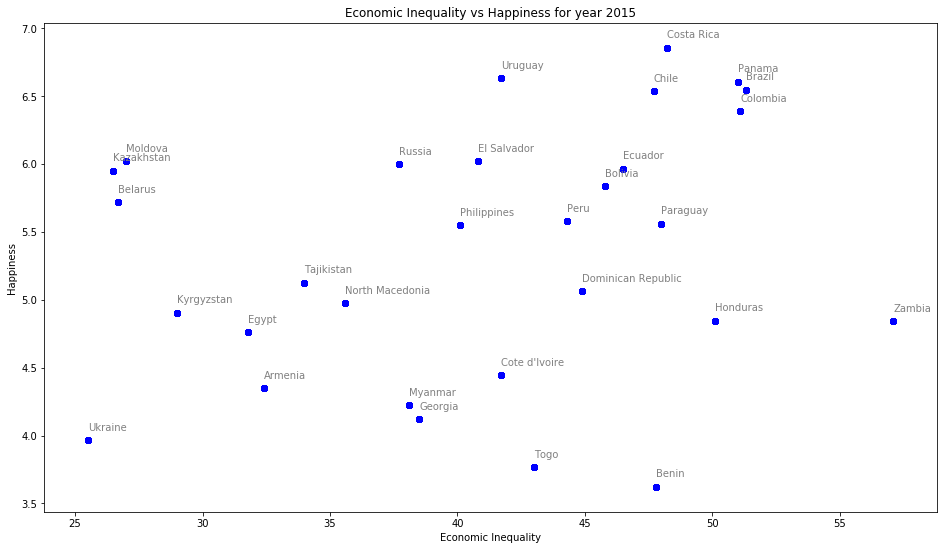

In [11]:
#read the file from github
happiness_url = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a1/happiness-cantril-ladder.csv'
economic_url  = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a1/economic-inequality-gini-index.csv'
#read the data
happiness_data = pd.read_csv(happiness_url)
economic_data  = pd.read_csv(economic_url)
#look at particular year to narrow down data, 2015 since it exists in both data frames
economic_data_2015  = economic_data.loc[economic_data['Year'].isin(['2015'])]
happiness_data_2015  = happiness_data.loc[happiness_data['Year'].isin(['2015'])]
#countries for each dataframe for a particular year (2015)
economic_countries_2015  = economic_data_2015['Entity']
happiness_countries_2015 = happiness_data_2015['Entity']
# all countries for year 2015 that contains in both dataframes
common_countries = economic_countries_2015[economic_countries_2015.isin(happiness_countries_2015)]

#plot
economic_samecountries_2015  = economic_data_2015.loc[economic_data['Entity'].isin(common_countries)]
happiness_samecountries_2015 = happiness_data_2015.loc[happiness_data['Entity'].isin(common_countries)]
#get the values and plot
economic_inequality = economic_samecountries_2015['GINI index (World Bank estimate)']
happiness           = happiness_samecountries_2015['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
x = economic_inequality.values
y = happiness.values
plt.subplots(figsize=(16,9))

for i, txt in enumerate(common_countries.values):
  plt.annotate(txt, (x[i], y[i]), xytext=(0,10), textcoords= 
               'offset points', color='gray')
  plt.scatter(x,y, color='blue')
plt.xlabel("Economic Inequality")
plt.ylabel("Happiness")
plt.title('Economic Inequality vs Happiness for year 2015')
plt.show()

# Happiness Vs Corruption

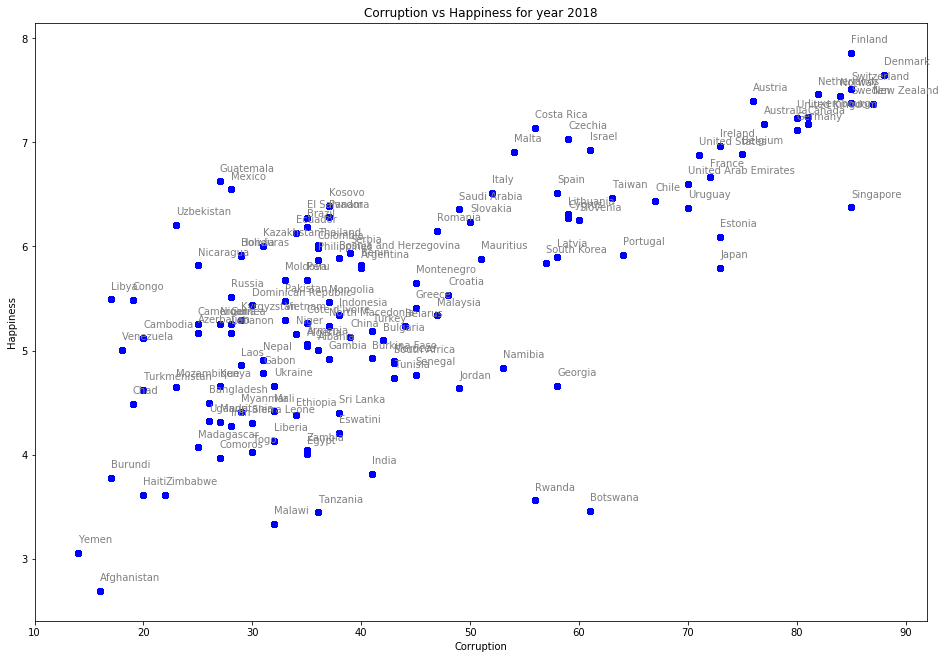

In [12]:
#read the file from github
corruption_url  = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a1/TI-corruption-perception-index.csv'
#read the data
corruption_data = pd.read_csv(corruption_url)
#look at particular year to narrow down data, 2018 since it exists in both data frames and is the most recent
corruption_data_2018 = corruption_data.loc[corruption_data['Year'].isin(['2018'])]
happiness_data_2018  = happiness_data.loc[happiness_data['Year'].isin(['2018'])]
#countries for each dataframe for a particular year (2018)
corruption_countries_2018 = corruption_data_2018['Entity']
happiness_countries_2018  = happiness_data_2018['Entity']
# all countries for year 2018 that contains in both dataframes
common_countries2 = corruption_countries_2018[corruption_countries_2018.isin(happiness_countries_2018)]
#sort out countries so we have same amount of values
corruption_samecountries_2018 = corruption_data_2018.loc[corruption_data['Entity'].isin(common_countries2)]
happiness_samecountries_2018  = happiness_data_2018.loc[happiness_data['Entity'].isin(common_countries2)]
#get the values and plot
corruption    = corruption_samecountries_2018['Corruption Perception Index - Transparency International (2018)']
happiness2018 = happiness_samecountries_2018['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
x = corruption.values
y = happiness2018.values
plt.subplots(figsize=(16,11))
#Scatter plot to detect the min,max and middle
for i, txt in enumerate(common_countries2.values):
  plt.annotate(txt, (x[i], y[i]), xytext=(0,10), textcoords= 
               'offset points', color='gray')
  plt.scatter(x,y, color='blue')
plt.xlabel("Corruption")
plt.ylabel("Happiness")
plt.title('Corruption vs Happiness for year 2018')
plt.show()

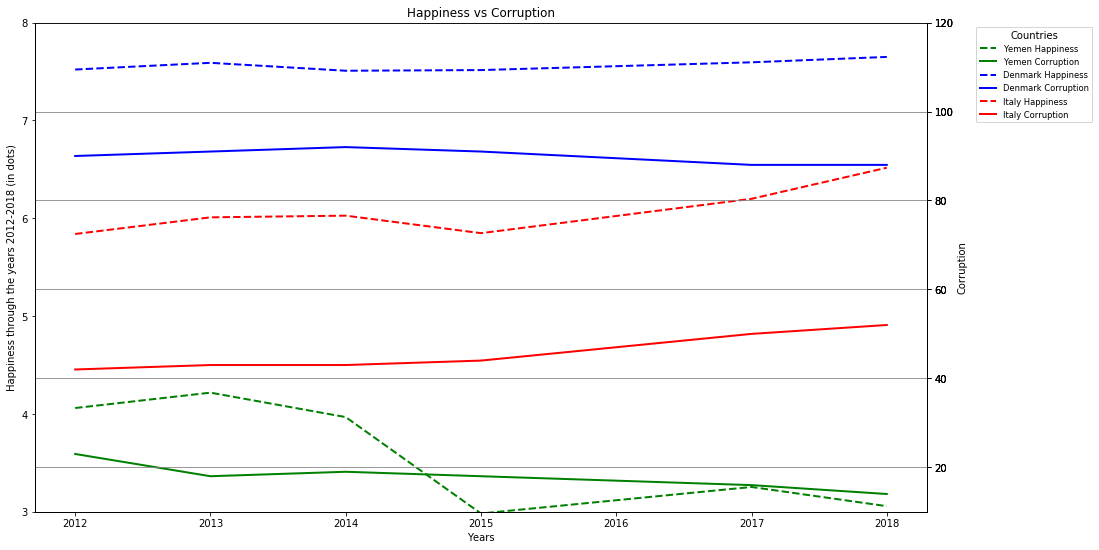

In [13]:
# Yemen
yemen_happiness_data = happiness_data.loc[happiness_data['Entity'].
                                          isin(['Yemen'])]
yemen_corruption_data = corruption_data.loc[corruption_data['Entity'].
                                            isin(['Yemen'])]
# get data from a country and cut to get the same years
yemen_happiness_data_2012to2018 = yemen_happiness_data.loc[yemen_happiness_data['Year'].
                                                       isin(['2012','2013','2014','2015','2015',
                                                             '2017','2018'])]
yemen_corruption_data_2012to2018 = yemen_corruption_data.loc[yemen_corruption_data['Year'].
                                                           isin(['2012','2013','2014','2015','2015',
                                                                 '2017','2018'])]
x1 = yemen_happiness_data_2012to2018['Year']
y1 = yemen_happiness_data_2012to2018['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
x2 = yemen_corruption_data_2012to2018['Year']
y2 = yemen_corruption_data_2012to2018['Corruption Perception Index - Transparency International (2018)']
# Denmark
denmark_happiness_data = happiness_data.loc[happiness_data['Entity'].
                                            isin(['Denmark'])]
denmark_corruption_data = corruption_data.loc[corruption_data['Entity'].
                                              isin(['Denmark'])]
denmark_happiness_data_2012to2018 = denmark_happiness_data.loc[denmark_happiness_data['Year'].
                                                               isin(['2012','2013','2014','2015','2015',
                                                                     '2017','2018'])]
denmark_corruption_data_2012to2018 = denmark_corruption_data.loc[denmark_corruption_data['Year'].
                                                                 isin(['2012','2013','2014','2015','2015',
                                                                       '2017','2018'])]
x3 = denmark_happiness_data_2012to2018['Year']
y3 = denmark_happiness_data_2012to2018['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
x4 = denmark_corruption_data_2012to2018['Year']
y4 = denmark_corruption_data_2012to2018['Corruption Perception Index - Transparency International (2018)']
# Italy
italy_happiness_data = happiness_data.loc[happiness_data['Entity'].
                                          isin(['Italy'])]
italy_corruption_data = corruption_data.loc[corruption_data['Entity'].
                                            isin(['Italy'])]
italy_happiness_data_2012to2018 = italy_happiness_data.loc[italy_happiness_data['Year'].
                                                               isin(['2012','2013','2014','2015','2015',
                                                                     '2017','2018'])]
italy_corruption_data_2012to2018 = italy_corruption_data.loc[italy_corruption_data['Year'].
                                                                 isin(['2012','2013','2014','2015','2015',
                                                                       '2017','2018'])]
x5 = italy_happiness_data_2012to2018['Year']
y5 = italy_happiness_data_2012to2018['Life satisfaction in Cantril Ladder (World Happiness Report 2019)']
x6 = italy_corruption_data_2012to2018['Year']
y6 = italy_corruption_data_2012to2018['Corruption Perception Index - Transparency International (2018)']
#horizontally subplots
fig, axis_1 = plt.subplots(figsize = (16,9))
# Yemen 1st y-axis
h_yemen, = axis_1.plot(x1, y1, linestyle = 'dashed',
                color='green', linewidth=2, 
                label='Yemen Happiness') 
axis_1.set_ylim([3, 8])
# 2nd y-axis
axis_2  = axis_1.twinx() # Create a twin Axes sharing the xaxis
c_yemen, = axis_2.plot(x2, y2, color='green',
                linewidth=2, label='Yemen Corruption')
axis_2.set_ylim([10, 120])

# Denmark - 1st y-axis
h_denmark, = axis_1.plot(x3, y3, linestyle = 'dashed', 
                color='blue', linewidth=2,
                label='Denmark Happiness') 
axis_1.set_ylim([3, 8])
# 2nd y-axis
axis_2 = axis_1.twinx()
c_denmark, = axis_2.plot(x4, y4,color='blue', 
               linewidth=2, label='Denmark Corruption')
axis_2.set_ylim([10, 120])

# Italy - 1st y-axis
h_italy, = axis_1.plot(x5, y5, linestyle = 'dashed',
                color='red', linewidth=2, 
                label='Italy Happiness') 
axis_1.set_ylim([3, 8])
# 2nd y-axis
axis_2  = axis_1.twinx()
c_italy, = axis_2.plot(x6, y6, color='red',
                linewidth=2, label='Italy Corruption')
axis_2.set_ylim([10, 120])
axis_1.set_xlabel("Years") 
axis_1.set_ylabel("Happiness through the years 2012-2018 (in dots)")
axis_2.set_ylabel("Corruption")
plt.title('Happiness vs Corruption')
plt.legend(handles=[h_yemen,c_yemen,h_denmark,c_denmark,h_italy,c_italy],
           title='Countries', bbox_to_anchor=(1.05, 1),
           loc='upper left', prop=fontP)
plt.grid(True, color='gray')
plt.show()

# Trust Vs Corruption

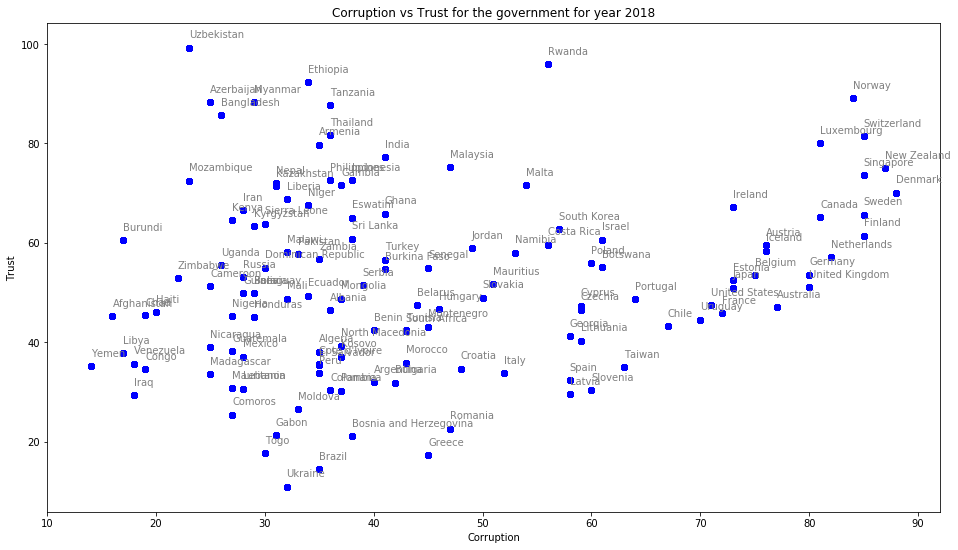

In [14]:
#read url from github
trust_url = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a1/share-who-trust-government.csv'
#read trust data which is from 2018
trust_data_2018 = pd.read_csv(trust_url)
#countries involved in the study
trust_countries_2018 = trust_data_2018['Entity']
#common countries for both data frames in order to have the same size of data
common_countries3 = corruption_countries_2018[corruption_countries_2018.isin(trust_countries_2018)]
#sort out the common countries
corruption_commoncountries_2018 = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(common_countries3)]
trust_commoncountries_2018      = trust_data_2018.loc[trust_data_2018['Entity'].isin(common_countries3)]
#get the values to be able to plot
corruption2018 = corruption_commoncountries_2018['Corruption Perception Index - Transparency International (2018)']
trust2018      = trust_commoncountries_2018['Share of people who trust their national government']
x = corruption2018.values
y = trust2018.values
plt.subplots(figsize=(16,9))
#Scatter plot
for i, txt in enumerate(common_countries3.values):
  plt.annotate(txt, (x[i], y[i]), xytext=(0,10), textcoords= 
               'offset points', color='gray')
  plt.scatter(x,y, color='blue')
plt.xlabel("Corruption")
plt.ylabel("Trust")
plt.title('Corruption vs Trust for the government for year 2018')
plt.show()

In [15]:
#scatterplot have to much data, lets divide the data points into continents
#lets take some two countries on the lower-,middle- and higher end.
#Rwanda, Norway, Uzbekistan, Ukraine, Iraq, Australia
#Corruption data for each country (2018)
rwanda_corruption_data_2018     = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(['Rwanda'])]
norway_corruption_data_2018     = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(['Norway'])]
uzbekistan_corruption_data_2018 = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(['Uzbekistan'])]
ukraine_corruption_data_2018    = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(['Ukraine'])]
iraq_corruption_data_2018       = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(['Iraq'])]
australia_corruption_data_2018  = corruption_data_2018.loc[corruption_data_2018['Entity'].isin(['Australia'])]
#Trust data for each country (2018)
rwanda_trust_data_2018     = trust_data_2018.loc[trust_data_2018['Entity'].isin(['Rwanda'])]
norway_trust_data_2018     = trust_data_2018.loc[trust_data_2018['Entity'].isin(['Norway'])]
uzbekistan_trust_data_2018 = trust_data_2018.loc[trust_data_2018['Entity'].isin(['Uzbekistan'])]
ukraine_trust_data_2018    = trust_data_2018.loc[trust_data_2018['Entity'].isin(['Ukraine'])]
iraq_trust_data_2018       = trust_data_2018.loc[trust_data_2018['Entity'].isin(['Iraq'])]
australia_trust_data_2018  = trust_data_2018.loc[trust_data_2018['Entity'].isin(['Australia'])]
#trust rate column & corruption rate column
rwanda_corruption_rate_2018     = rwanda_corruption_data_2018['Corruption Perception Index - Transparency International (2018)']
rwanda_trust_rate_2018          = rwanda_trust_data_2018['Share of people who trust their national government']
norway_corruption_rate_2018     = norway_corruption_data_2018['Corruption Perception Index - Transparency International (2018)']
norway_trust_rate_2018          = norway_trust_data_2018['Share of people who trust their national government']
uzbekistan_corruption_rate_2018 = uzbekistan_corruption_data_2018['Corruption Perception Index - Transparency International (2018)']
uzbekistan_trust_rate_2018      = uzbekistan_trust_data_2018['Share of people who trust their national government']
ukraine_corruption_rate_2018    = ukraine_corruption_data_2018['Corruption Perception Index - Transparency International (2018)']
ukraine_trust_rate_2018         = ukraine_trust_data_2018['Share of people who trust their national government']
iraq_corruption_rate_2018       = iraq_corruption_data_2018['Corruption Perception Index - Transparency International (2018)']
iraq_trust_rate_2018            = iraq_trust_data_2018['Share of people who trust their national government']
australia_corruption_rate_2018  = australia_corruption_data_2018['Corruption Perception Index - Transparency International (2018)']
australia_trust_rate_2018       = australia_trust_data_2018['Share of people who trust their national government']
#values
rwanda_corruption_value     = rwanda_corruption_rate_2018.values
rwanda_trust_value          = rwanda_trust_rate_2018.values
norway_corruption_value     = norway_corruption_rate_2018.values
norway_trust_value          = norway_trust_rate_2018.values
uzbekistan_corruption_value = uzbekistan_corruption_rate_2018.values
uzbekistan_trust_value      = uzbekistan_trust_rate_2018.values
ukraine_corruption_value    = ukraine_corruption_rate_2018.values
ukraine_trust_value         = ukraine_trust_rate_2018.values
iraq_corruption_value       = iraq_corruption_rate_2018.values
iraq_trust_value            = iraq_trust_rate_2018.values
australia_corruption_value  = australia_corruption_rate_2018.values
australia_trust_value       = australia_trust_rate_2018.values

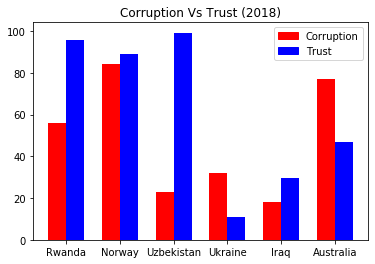

In [16]:
#PLOT CODE
figure = plt.figure()
subplot = figure.add_subplot()
index = 1
width = 1
plt.bar(index, rwanda_corruption_value, width, color="red")
plt.bar(index + width, rwanda_trust_value, width, color="blue")
new_index = 4
plt.bar(new_index, norway_corruption_value, width, color="red")
plt.bar(new_index + width, norway_trust_value, width, color="blue")
new_index = 7
plt.bar(new_index, uzbekistan_corruption_value, width, color="red")
plt.bar(new_index + width, uzbekistan_trust_value, width, color="blue")
new_index = 10
plt.bar(new_index, ukraine_corruption_value, width, color="red")
plt.bar(new_index + width, ukraine_trust_value, width, color="blue")
new_index = 13
plt.bar(new_index, iraq_corruption_value, width, color="red")
plt.bar(new_index + width, iraq_trust_value, width, color="blue")
new_index = 16
plt.bar(new_index, australia_corruption_value, width, color="red")
plt.bar(new_index + width, australia_trust_value, width, color="blue")
x=[1.5,4.5,7.5,10.5,13.5,16.5]
plt.title('Corruption Vs Trust (2018)')
plt.xticks(x,labels=['Rwanda','Norway','Uzbekistan','Ukraine','Iraq','Australia'])
colors = {'Corruption':'red', 'Trust':'blue'}
labels = list(colors.keys())
handles = handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

**2.b)	Discuss any observations that you make, or insights obtained, from the data visualisations.**

- **Happiness related with economic inequality**
  
  1. The scatter plot showed a big diversity where we could see that in some countries the economic inequality really affected how less happy people are, for instance in the countries Zambia, Honduras and Benin.
Then we have the cases where people are still happy despite the economic inequalities, especially the south american countries such as Colombia, Brazil, Panama,Chile and Costa Rica. 
  2. There also exist the cases where there are very small difference in economic inequality where people are less happy, expecially in the countries such as Ukraine,Egypt, Armenia and Kyrgyzstan.
  
  From here, we can conclude that even though the economic inequality is high it does not result in people not being happy and also if the economic inequality is low it does not result in people being happy.

- **Happniess vs corruption for countries**
  1. From the scatterplot, it was hard to observe the different data points so we selected 3 cases that we wanted to take a closer look at in a timespan(2012-2018).
Yemen being the minimum case and italy the middle case and denmark the maximum case.
  2. In the line plot we can see that the perception of corruption in Yemen don't change much but the happiness changes alot. 
  3. In 2012 despite people having the highest perception of corruption they were still the happiest. The people became less happy when there was a less perception of corruption which is something we did not anticipate.
  4. In the case of Italy we find a similarity but not as dramatic as the case of Yemen. People in Italy are happiest when there is a higher perception of corruption, and still pretty happy the other years where the perception of corruption have been moderate.
  5. The people of Denmark seem to be happy either way, They have the highest perception of corruption but through the years they manage to still be happy which is also something we did not anticipate.

  From here we can conclude that the perception of corruption does not significantly affect how happy people are. There is no strong correlation between the two.

- **Trust and Corruption**
  1. From the scatterplot, we narrowed down the data and chose 6 countries that we found to be interesting cases to prove our hypotheses or not.
  2. From the barplot we can see a mix of cases where:
  * Rwanda have a significant rate of perceived corruption but the people still have trust for their government.
  * In Norway the perception of corruption is pretty high but still the people have a lot of trust for their government which we did not anticipate.
  * In Uzbekistan there is a low rate of perceived corruption and a high trust for the government which is something we anticipated.
  * In Ukraine there is the opposte where there is a high perception of corruption and low rate of trust for the government which was also expected.
  * In Iraq there is low ratio between the perceived corruption and trust. The trust for the government is not high despite the perceived corruption being low which makes us wonder why?
  * In Australia there is a high perception of corruption but the trust for the government is still decent which raises some question marks.

  From here we can conclude that high perception of corruption does not solely result in low trust for the government which is something we anticipated.